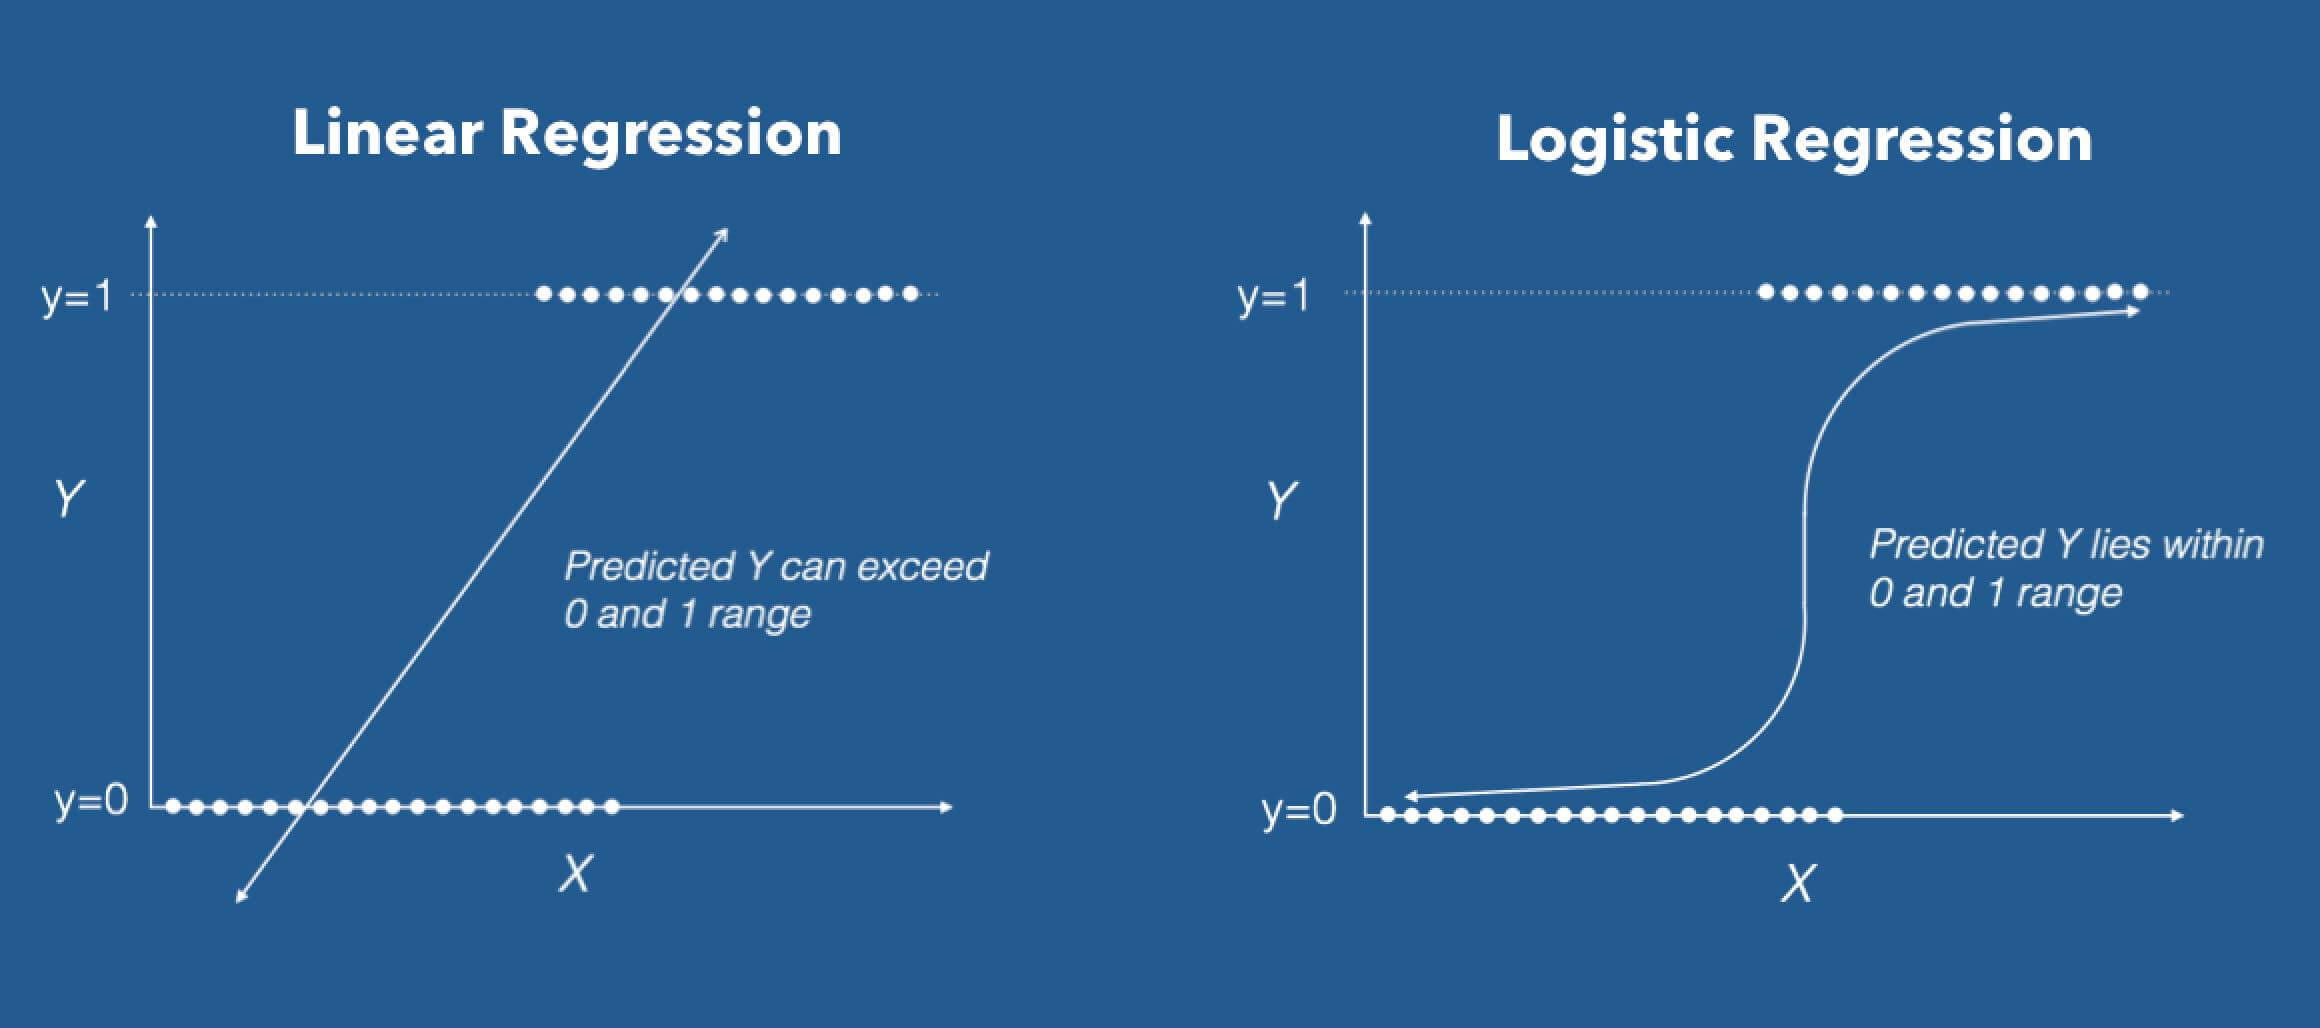

# What is the Sigmoid Function?
In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.


![](https://miro.medium.com/max/1280/1*OUOB_YF41M-O4GgZH_F2rw.png)

### computing cost for 1 iteration

Define a cost function and try to find the best possible values of each θ by minimizing the cost function output. The minimization will be performed by a gradient descent algorithm, whose task is to parse the cost function output until it finds the lowest minimum point.

![](https://i.stack.imgur.com/XbU4S.png)

# Gradient Descent 

It is an optimization algorithm for finding a local minimum of a differentiable function. Gradient descent is simply used in machine learning to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible.

![](http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png)

In [ ]:
def rnorm(n,mean=0,sd=1):
    """
    Generates random variables from the normal distribution
    """
    from scipy.stats import norm
    result=norm.rvs(size=n,loc=mean,scale=sd)
    return result

In [ ]:
def rbinorm(n,size,prob=0.5):
    """
    Generates random variables from the binomial distribution
    """
    from scipy.stats import binom
    result=binom.rvs(n=size,p=prob,size=n)
    return result

In [ ]:
import numpy as np

sample_size = 100
beta_0 = -2
beta_1 = 3

X = rnorm(n=sample_size)
eta = beta_0 + beta_1 * X
p = 1 / (1 + np.exp(-eta))
y = rbinorm(n = sample_size, size = 1, prob = p)

In [ ]:
X = np.reshape(X, (sample_size,1))
y = np.reshape(y, (sample_size,1))

<Figure size 432x288 with 0 Axes>

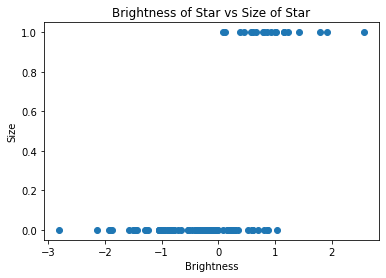

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(X, y)
plt.xlabel('Brightness')
plt.ylabel('Size')
plt.title('Brightness of Star vs Size of Star')
plt.figure()

In [ ]:
m, n = X.shape
m, n

(100, 1)

In [ ]:
W = np.zeros(n)
b = 0

iterations = 1000
learning_rate = 0.01

In [ ]:
def sigmoid(s):
    Z = 1.0 / (1 + np.exp(-s)) 
    return Z

In [ ]:
def predict(X, W, b):
    k = sigmoid(W*X + b)
    #y_pred = np.where( k > 0.5, 1, 0 )  
    return k

In [ ]:
def cost_function(X, y, W, b):
    '''
    Using Mean Absolute Error

    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(y)

    predictions = predict(X, W, b)

    #Take the error when label=1
    class1_cost = -y*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-y)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

In [ ]:
def update_weights(X, y, W, b, learning_rate):
    #1 - Get Predictions
    predictions = predict(X, W, b)
    
    m, n = X.shape    
    tmp = (predictions - y)        
    tmp = np.reshape(tmp, m)   
    gradient = np.dot(X.T,  tmp)
    
    dW = np.dot(X.T, tmp) / m         
    db = np.sum(tmp) / m 
          
    # update weights    
    W = W - learning_rate * dW    
    b = b - learning_rate * db

    return W, b

In [ ]:
def train(X, y, W, b, learning_rate, iterations):
    costs = []

    for i in range(iterations):
        W, b = update_weights(X, y, W, b, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(X, y, W, b)
        costs.append(cost)

        # Log Progress
        if i % 100 == 0:
            print("iter={}, weight={}, bias={}, cost={}".format(i, W, b, cost))

    return W, b, costs

In [ ]:
costs = np.zeros(iterations)

# Running Gradient Descent
#W, b, costs = gradient_descent(X, y, W, b, learning_rate, iterations)
W, b, costs = train(X, y, W, b, learning_rate, iterations)

iter=0, weight=[0.00289851], bias=-0.003, cost=0.691409543038768
iter=100, weight=[0.25621569], bias=-0.26268300542592027, cost=0.559130242754284
iter=200, weight=[0.45346262], bias=-0.4593367510326988, cost=0.48125472932476143
iter=300, weight=[0.61381523], bias=-0.6128402519619545, cost=0.43185042058111234
iter=400, weight=[0.7492627], bias=-0.736297851080835, cost=0.39820390200937406
iter=500, weight=[0.86703857], bias=-0.8381634979190701, cost=0.3739273175083526
iter=600, weight=[0.97165239], bias=-0.9240283236269888, cost=0.3555955282318801
iter=700, weight=[1.06605068], bias=-0.9977152383550398, cost=0.34124660642599186
iter=800, weight=[1.15224951], bias=-1.0619217776647536, cost=0.3296893478723635
iter=900, weight=[1.23168643], bias=-1.1186044860691406, cost=0.3201636132629205


In [ ]:
W

array([1.30471199])

In [ ]:
# printing final values.
print('Final W value: {}\nFinal b value: {}'.format(W, b))
print('Final Cost/MSE(L2 Loss) Value: {}'.format(costs[-1]))

Final W value: [1.30471199]
Final b value: -1.168736358887067
Final Cost/MSE(L2 Loss) Value: 0.31223705954450354


Text(0.5, 1.0, 'Cost vs Iterations Analysis')

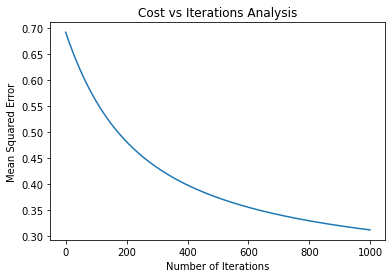

In [ ]:
# Plotting Line Plot for Number of Iterations vs MSE
plt.plot(range(iterations), costs)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')

In [ ]:
# Prediction

# Generate data points like before
X_test = rnorm(n=25)
eta = beta_0 + beta_1 * X_test
p = 1 / (1 + np.exp(-eta))
y_test = rbinorm(n = 25, size = 1, prob = p)

# Show the data points
data_string = 'Data point: {}, {}'
print(data_string.format(X_test, y_test))

Data point: [-1.28568912  0.29128543  1.28518429  0.2258221  -1.06143875 -2.07501176
 -0.67137591  2.11130774  0.35143478 -0.26354024  0.35775378 -0.1143516
 -0.2992942  -0.54898922  1.00255502  0.43167765  0.49065372 -0.03083184
  1.57417617 -0.03955621 -0.60696882  0.15356788  1.85822322  0.33225943
 -0.64500851], [0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0]


In [ ]:
prediction = predict(X_test, W, b)
prediction

array([0.05487858, 0.31244943, 0.62435135, 0.29440116, 0.07218446,
       0.02031187, 0.11459017, 0.8300402 , 0.32955129, 0.18055668,
       0.33137544, 0.21116252, 0.17375729, 0.13181457, 0.53477108,
       0.35308151, 0.37084941, 0.22988458, 0.70788005, 0.2278756 ,
       0.12339609, 0.27520462, 0.77828668, 0.32404732, 0.11812711])

In [ ]:
len(prediction)

25

In [ ]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [ ]:
def classify(prediction):
    db = np.zeros(len(prediction))
    for i in range(len(prediction)):
        if prediction[i] >= 0.5:
            db[i] = 1    
    return db.flatten()

In [ ]:
classifications = classify(prediction)
accuracy(classifications, y_test)

0.96

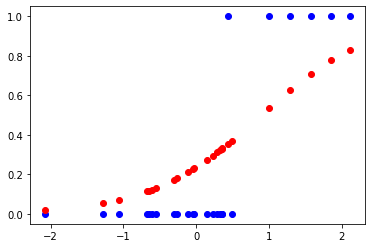

In [ ]:
plt.scatter(X_test, y_test, color="blue", label="original")
plt.scatter(X_test, prediction, color="red", label="predicted")

In [ ]:
# Let's talk about one star now!

#Generate one data point
X_test = rnorm(n=1)
eta = beta_0 + beta_1 * X_test
p = 1 / (1 + np.exp(-eta))
y_test = rbinorm(n=1, size = 1, prob = p)

# Show the data point
data_string = 'Data point: {}, {}'
print(data_string.format(X_test, y_test))

Data point: [0.14346212], [0]


In [ ]:
prediction = predict(X_test, W, b)
#prediction
classifications = classify(prediction)
accuracy(classifications, y_test)

1.0

In [ ]:
if prediction >= 0.5:
    print('We\'ve got a big star..')
else:
    print('We\'ve got a cute lil star!')

We've got a cute lil star!


Resources for Math of ML:

https://probability4datascience.com/ch02.html

https://mml-book.github.io/book/mml-book.pdf 